**COVID-19 X-Ray and CT Scan Classification,**
**Author: Sandi Besen**
Date 5/28/2020

## Load Libraries and Setup





Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import fastai library and metrics

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from urllib import *

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings; warnings.simplefilter('ignore')

## Download Data

Mount Google Drive so we can download the data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


change the current working directory to the Classification folder

In [ ]:
%cd /content/gdrive/My Drive/Classification

/content/gdrive/My Drive/Classification



check the current working directory for confirmation that we are working in the correct folder

In [ ]:
%pwd

'/content/gdrive/My Drive/Classification'

Extract the Zip File and then write out the folders to the wordking directory

In [ ]:
## extracting zip file
import zipfile

def main():

    # assigning filename to a variable
    file_name = 'covid.zip'

    # opening Zip using 'with' keyword in read mode
    with zipfile.ZipFile(file_name, 'r') as file:
        # printing all the information of archive file contents using 'printdir' method
        print(file.printdir())

        # extracting the files using 'extracall' method
        print('Extracting all files...')
        file.extractall()
        print('Done!') # check your directory of zip file to see the extracted files

if __name__ == '__main__': main()

File Name                                             Modified             Size
annotations/imageannotation_ai_lung_bounding_boxes.json 2020-05-15 00:32:00       299119
images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg 2020-05-15 00:32:00       367441
images/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg 2020-05-15 00:32:02       312368
images/1-s2.0-S0140673620303706-fx1_lrg.jpg    2020-05-15 00:32:02       813392
images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  2020-05-15 00:32:02       198740
images/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  2020-05-15 00:32:02       276425
images/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  2020-05-15 00:32:02       309286
images/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  2020-05-15 00:32:02       191401
images/1-s2.0-S0929664620300449-gr3_lrg-a.jpg  2020-05-15 00:32:02       250922
images/1-s2.0-S0929664620300449-gr3_lrg-b.jpg  2020-05-15 00:32:02       273116
images/1-s2.0-S0929664620300449-gr3_lrg-c.jpg  2020-05-15 00:32:02       276527
images/1-s2.0-S092966462030

Get the paths for the images, annotations, and metadata (labels)

## Get Images

In [ ]:
path_anno = '/content/gdrive/My Drive/Classification/annotations'
path_images = '/content/gdrive/My Drive/Classification/images'
path_meta = '/content/gdrive/My Drive/Classification/metadata.csv'
path = '/content/gdrive/My Drive/Classification/'

get the images from the image path

In [ ]:
fnames = get_image_files(path_images)

In [ ]:
fnames[:5]

[PosixPath('/content/gdrive/My Drive/Classification/images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'),
 PosixPath('/content/gdrive/My Drive/Classification/images/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg'),
 PosixPath('/content/gdrive/My Drive/Classification/images/1-s2.0-S0140673620303706-fx1_lrg.jpg'),
 PosixPath('/content/gdrive/My Drive/Classification/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg'),
 PosixPath('/content/gdrive/My Drive/Classification/images/1-s2.0-S0929664620300449-gr2_lrg-b.jpg')]

Get transforms

In [ ]:
tfms = get_transforms(do_flip=False)

In [ ]:
bs = 16

In [ ]:
get_transforms??

## Create DataBunch

Create a databunch from the metadata csv. The label is the 'findings' column and the file nale is the 'filename' column. Include the transform and make the image size 340 so it is very good resolution. Metadata csv and images must be in the same folder

In [ ]:
data = ImageDataBunch.from_csv(path_images, csv_labels='metadata_balanced.csv',label_col='binary-finding' ,fn_col = 'filename', bs = bs, ds_tfms=tfms, size=340).normalize(imagenet_stats);

In [ ]:
ImageDataBunch??

show the images

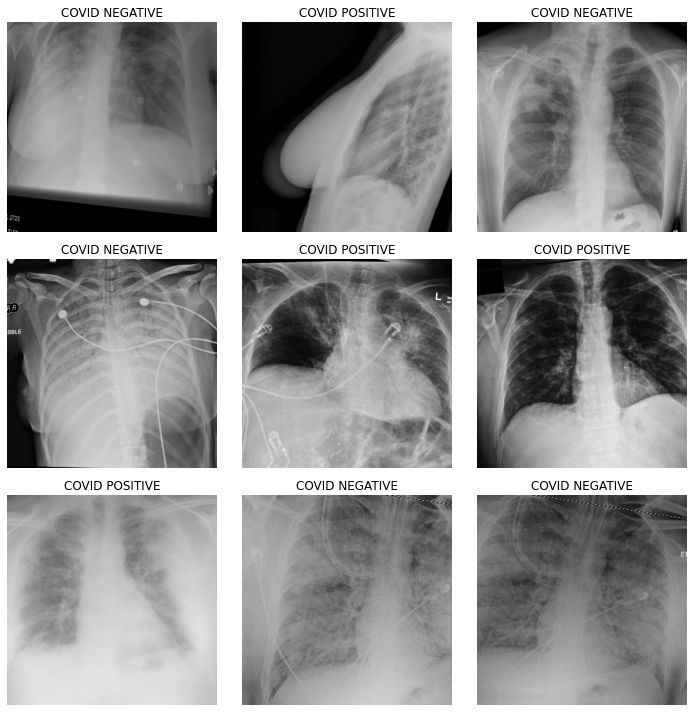

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

open a single image

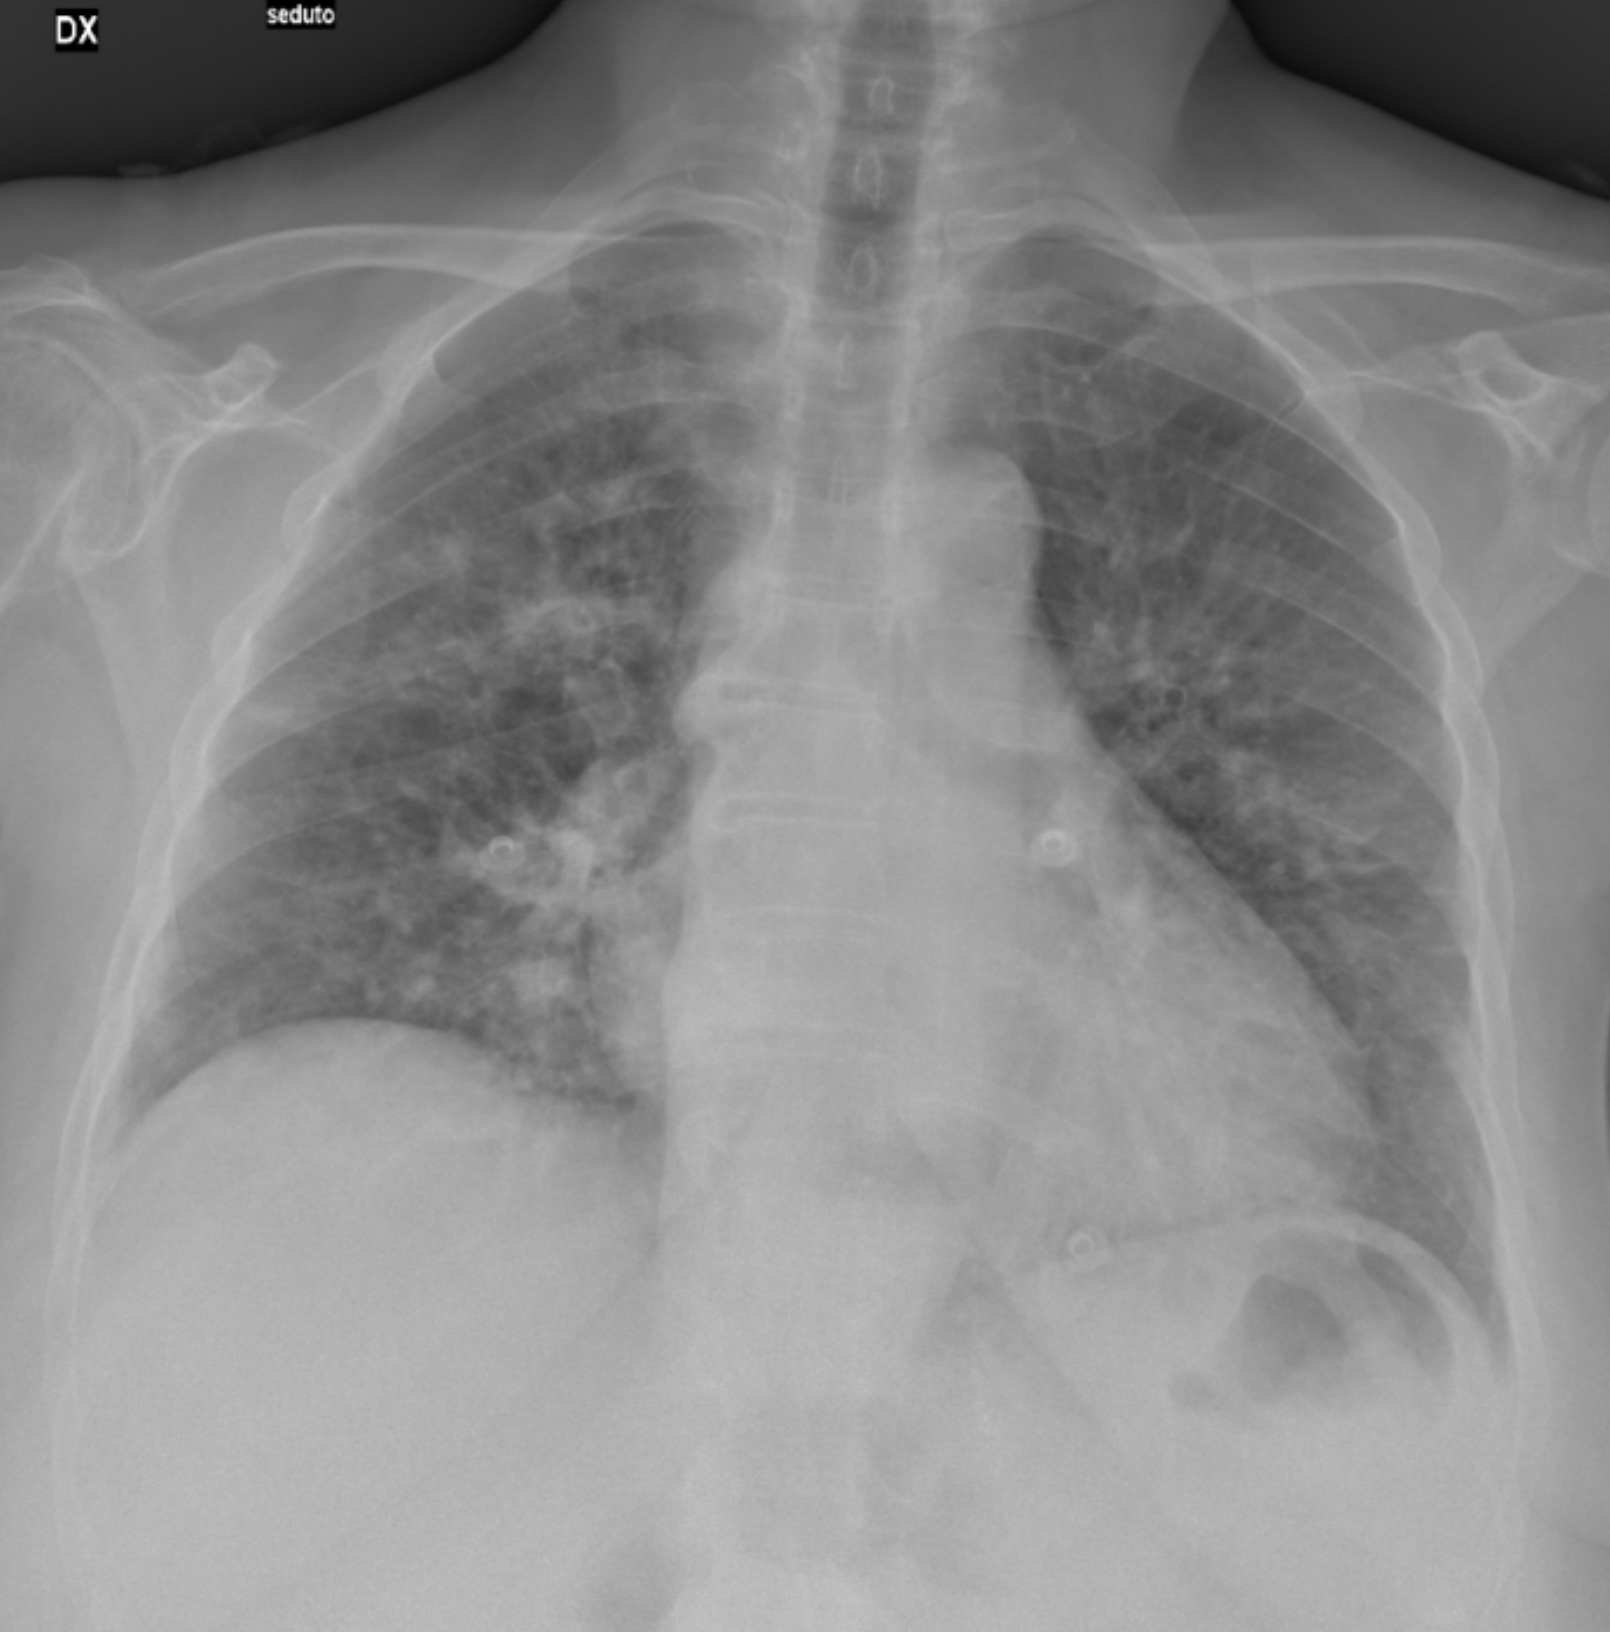

In [ ]:
open_image(str(path_images)+'/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg')

print the classes. There are 11 of them.

In [ ]:
print(data.classes)
len(data.classes),data.c

['COVID NEGATIVE', 'COVID POSITIVE']


(2, 2)

##Train


Build a resnet50 as it usually performs better than resnet34 beacuse it has more layers

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

view the makeup of the model.
Our model has 2 layers (input and output) and 6 hidden layers

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

Fit the model. I found the appropriate learning rate in the "Playing with training and finding learning rate" section.

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.511075,2.046176,0.474359,00:42
1,1.106610,0.949473,0.307692,00:42
2,0.937828,0.831948,0.243590,00:41
3,0.780435,0.664106,0.230769,00:42


let's save the model at this point before we train it further with a new learning rate.

In [ ]:
learn.save('stage-1')

##Results






Let's view the model's results so we can train it to be more accurate. These are the top 9 losses. (prediction, actual, loss, probability of actual class). Noticing a 0% probability of actual class? Need to discover.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

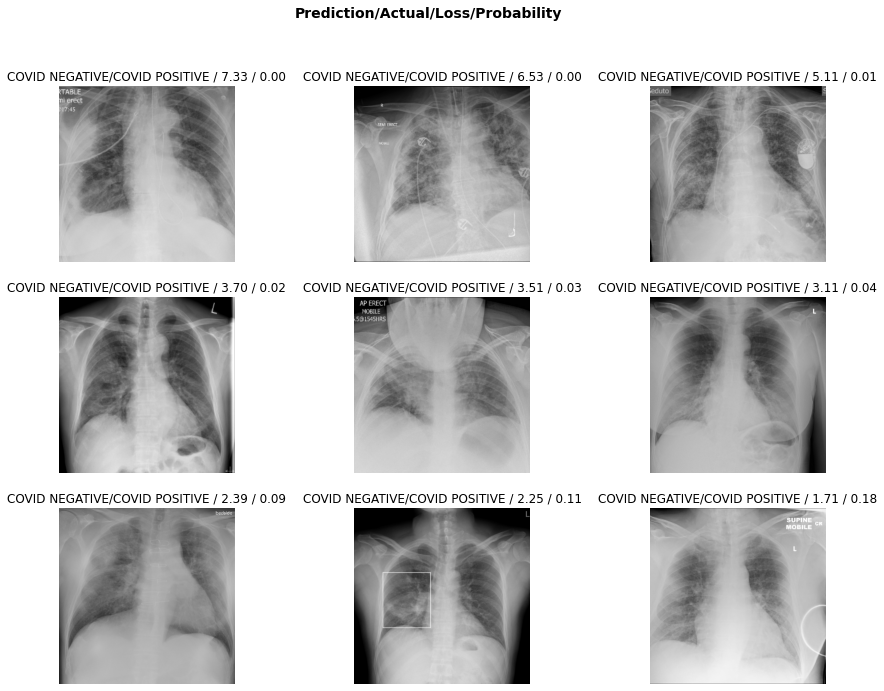

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

view confusion matrix. It keeps predicting COVID as Streptococcus. We must figure out how to correct this.

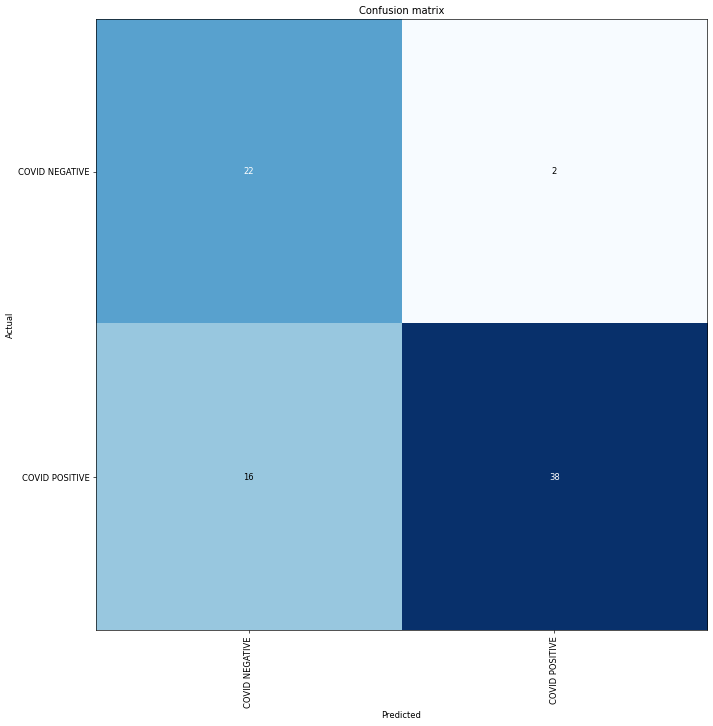

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Playing with training and finding learning rate 

In [ ]:
torch.cuda.empty_cache()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.393822,0.384815,0.166667,00:42


In [ ]:
learn.save('stage-2')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


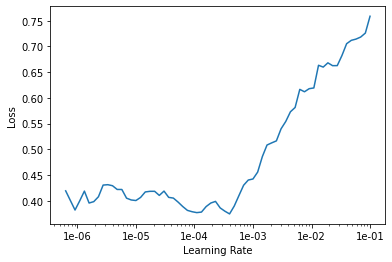

In [ ]:
learn.recorder.plot()

The range from le-04 to le-03 looks like a safe bet. Let's retrian using these weights.

In [ ]:
learn.load('stage-2');

In [ ]:
learn.fit_one_cycle(1,max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.419528,0.255506,0.115385,00:41


In [ ]:
learn.save('stage-3')

In [ ]:
interp2 = ClassificationInterpretation.from_learner(learn)

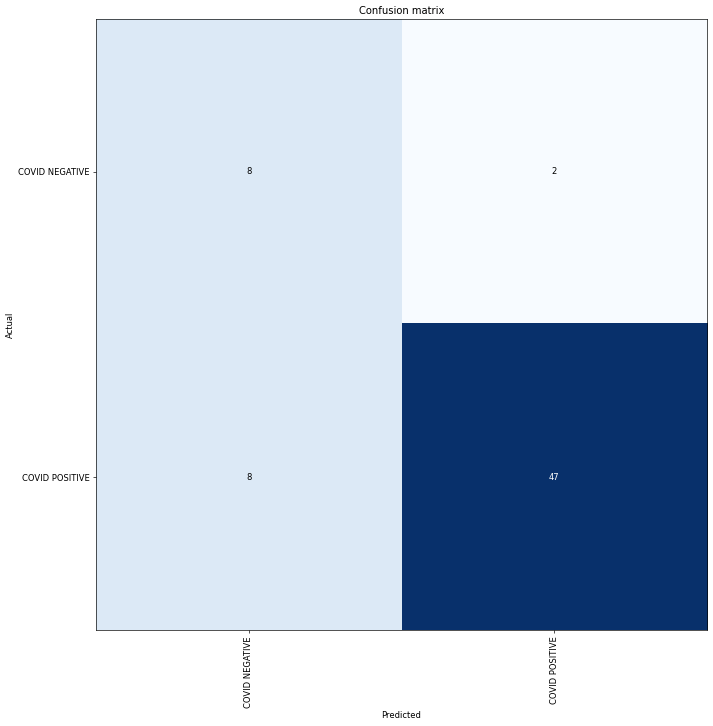

In [ ]:
interp2.plot_confusion_matrix(figsize=(12,12), dpi=60)